In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
#Drive mount
from google.colab import drive
import sys

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path='/content/drive/MyDrive/IITB/project/data'
models_dir='/content/drive/MyDrive/IITB/project/models'

In [ ]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

In [ ]:
df_windows=pd.read_csv(data_path+'/WINDOW_combined.csv')
df_features=pd.read_csv(data_path+'/df_features_trials.csv')

In [ ]:
df_windows.describe()

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.12/dist-pac

,Student_ID,start_time,end_time,label,Delta_TP9_mean,Delta_TP9_std,Delta_AF7_mean,Delta_AF7_std,Delta_AF8_mean,Delta_AF8_std,...,Fear_mean,Fear_std,Joy_mean,Joy_std,Sadness_mean,Sadness_std,Surprise_mean,Surprise_std,Engagement_mean,Engagement_std
count,7353.000000,7.353000e+03,7.353000e+03,7353.000000,7353.000000,2279.000000,7353.000000,2281.000000,7353.000000,7353.000000,...,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000
mean,20.080647,1.677036e+09,1.677036e+09,-0.640709,-inf,0.224505,-inf,0.261037,0.649388,0.265472,...,8.558287,6.578403,0.219824,0.313440,0.451799,0.434984,9.984494,7.575887,19.305559,11.718340
std,10.912011,1.295795e+06,1.295795e+06,4.096072,NaN,0.108513,NaN,0.133363,0.461040,0.144006,...,15.926103,8.403362,2.635443,2.809872,2.188052,2.087934,18.485430,9.254490,26.626585,9.118201
min,1.000000,1.675151e+09,1.675151e+09,-61.496618,-inf,0.007588,-inf,0.000000,-0.861812,0.000000,...,0.672491,0.954820,0.058258,0.115425,0.056765,0.081529,0.800369,1.186288,1.808283,4.534930
25%,11.000000,1.676290e+09,1.676290e+09,-0.058228,NaN,0.146494,NaN,0.162727,0.352759,0.164924,...,0.827435,2.155945,0.058340,0.118479,0.134916,0.107576,0.868303,2.575040,1.857981,5.167903
50%,21.000000,1.676726e+09,1.676726e+09,-0.046582,NaN,0.206869,NaN,0.235902,0.677983,0.242994,...,1.233371,2.328063,0.058971,0.119555,0.161701,0.119612,1.304686,2.787790,3.426090,5.716609
75%,29.000000,1.677244e+09,1.677244e+09,-0.045669,0.397610,0.276519,0.002292,0.340588,0.952439,0.342559,...,5.813241,5.864793,0.066834,0.131009,0.203359,0.137607,6.980725,7.093121,30.463674,17.178110
max,38.000000,1.680004e+09,1.680004e+09,70.793931,4.245065,1.632492,4.035933,1.567589,4.139463,1.692551,...,90.675229,40.981627,75.245412,49.915215,62.758373,42.240436,92.103583,48.527053,93.642971,48.252063


In [ ]:
df_windows.head(5)

,Student_ID,start_time,end_time,label,Delta_TP9_mean,Delta_TP9_std,Delta_AF7_mean,Delta_AF7_std,Delta_AF8_mean,Delta_AF8_std,...,Fear_mean,Fear_std,Joy_mean,Joy_std,Sadness_mean,Sadness_std,Surprise_mean,Surprise_std,Engagement_mean,Engagement_std
0,1,1.680003e+09,1.680003e+09,-0.046582,-inf,NaN,-inf,NaN,0.672587,0.434205,...,0.770300,2.179448,0.058972,0.119580,0.157824,0.107875,0.830391,2.598345,1.837874,5.169590
1,1,1.680003e+09,1.680003e+09,-0.045669,0.607065,0.148039,0.550701,0.292635,0.513880,0.315327,...,0.754044,2.160492,0.058296,0.118477,0.158088,0.106619,0.810483,2.575904,1.808283,5.121994
2,1,1.680003e+09,1.680003e+09,-0.046582,0.495067,0.146521,0.253063,0.345724,0.508380,0.418659,...,0.765665,2.180824,0.058969,0.119581,0.159706,0.107312,0.819317,2.601639,1.837874,5.169590
3,1,1.680003e+09,1.680003e+09,-0.068503,0.492251,0.213587,0.136657,0.378996,0.601245,0.427188,...,1.065283,2.589434,0.075401,0.141985,0.174593,0.127366,1.176010,3.089367,2.548042,6.138214
4,1,1.680003e+09,1.680003e+09,-0.045669,0.555957,0.240619,0.575670,0.322896,0.871633,0.451597,...,0.753106,2.160768,0.058284,0.118480,0.159270,0.106270,0.803638,2.577918,1.808283,5.121994


In [ ]:
df_features.head()

,Key,Category,QuestionNumber,matchOrnomatch,Difficulty,verdict,ResponseTime,routineStart,routineStamp,routineEnd,...,BlinkRate_mean,BlinkRate_occurrence,Pitch_mean,Pitch_occurrence,Yaw_mean,Yaw_occurrence,Roll_mean,Roll_occurrence,Interocular Distance_mean,Interocular Distance_occurrence
0,1spl1,1,spl1,match,Easy,CORRECT,10.369816,1.680003e+09,"28/03/2023, 17:04:09",1.680003e+09,...,1.262252,9,5.593308,105,-2.287437,7,2.859837,101,161.668409,105
1,1spl2,1,spl2,nomatch,Easy,CORRECT,7.913992,1.680003e+09,"28/03/2023, 17:04:20",1.680003e+09,...,1.288549,7,4.890974,80,-2.811611,0,3.282156,80,162.314265,80
2,1Item1,1,Item1,match,Easy,CORRECT,7.654472,1.680003e+09,"28/03/2023, 17:04:28",1.680003e+09,...,1.147502,6,4.564900,77,-3.357814,0,3.430304,77,161.634563,77
3,1Item2,1,Item2,match,Easy,CORRECT,14.597205,1.680003e+09,"28/03/2023, 17:04:35",1.680003e+09,...,1.393026,14,4.005232,148,-4.019279,0,3.261572,148,161.400163,148
4,1Item3,1,Item3,match,Easy,CORRECT,16.476566,1.680003e+09,"28/03/2023, 17:04:50",1.680003e+09,...,1.845316,31,4.287426,167,-4.410967,0,3.042621,167,161.843911,167


## Data preparation


Preprocess `df_windows` and `df_features` for temporal modeling.


In [ ]:
print("Missing values in df_windows:")
display(df_windows.isnull().sum())
print("\nMissing values in df_features:")
display(df_features.isnull().sum())

Missing values in df_windows:


,0
Student_ID,0
start_time,0
end_time,0
label,0
Delta_TP9_mean,0
Delta_TP9_std,5074
Delta_AF7_mean,0
Delta_AF7_std,5072
Delta_AF8_mean,0
Delta_AF8_std,0



Missing values in df_features:


,0
Key,0
Category,0
QuestionNumber,0
matchOrnomatch,0
Difficulty,0
...,...
Yaw_occurrence,0
Roll_mean,0
Roll_occurrence,0
Interocular Distance_mean,0



Handle missing values in `df_windows`. The 'std' columns have a large number of missing values, which are likely due to insufficient data points within a window to calculate standard deviation. Imputing with 0 might be a reasonable approach for these standard deviation values.



In [ ]:
# Impute missing 'std' values with 0 in df_windows
for col in df_windows.columns:
    if 'std' in col:
        df_windows[col] = df_windows[col].fillna(0)

# Handle infinite values in df_windows, which are likely from mean calculations on empty windows
df_windows.replace([np.inf, -np.inf], np.nan, inplace=True)
for col in df_windows.columns:
    if 'mean' in col:
        df_windows[col] = df_windows[col].fillna(df_windows[col].median()) # Impute mean with median

# Verify handling of missing values
print("Missing values in df_windows after imputation:")
display(df_windows.isnull().sum())

# df_features has no missing values based on the previous check, so no imputation is needed.

Missing values in df_windows after imputation:


,0
Student_ID,0
start_time,0
end_time,0
label,0
Delta_TP9_mean,0
Delta_TP9_std,0
Delta_AF7_mean,0
Delta_AF7_std,0
Delta_AF8_mean,0
Delta_AF8_std,0



Select numerical features for scaling and prepare the target variable. The numerical features are those that are not time or ID related. The target variable is 'verdict' from `df_features`, which needs to be encoded.



In [ ]:
# Select features from df_features (excluding non-numeric and identifying columns first)
feature_columns_to_drop = ['Key', 'Category', 'QuestionNumber', 'matchOrnomatch', 'Difficulty', 'verdict',
                           'routineStart', 'routineStamp', 'routineEnd', 'Cat2FeedbackTime', 'Student_ID']

# Filter out columns that are not in df_features
feature_columns_to_drop_filtered = [col for col in feature_columns_to_drop if col in df_features.columns]

# Drop the specified columns and then select numerical types
feature_features = df_features.drop(columns=feature_columns_to_drop_filtered).select_dtypes(include=np.number)


# Select numerical features from df_windows (excluding ID and time columns)
window_features = df_windows.select_dtypes(include=np.number).drop(columns=['Student_ID', 'start_time', 'end_time', 'label'])

# Prepare the target variable 'verdict' from df_features
label_encoder = LabelEncoder()
df_features['verdict_encoded'] = label_encoder.fit_transform(df_features['verdict'])

print("Selected window features shape:", window_features.shape)
print("Selected feature features shape:", feature_features.shape)
print("Target variable encoded.")

Selected window features shape: (7353, 54)
Selected feature features shape: (1448, 103)
Target variable encoded.



Scale the selected numerical features using StandardScaler and then structure the data into sequences based on Student_ID for both `window_features` and `feature_features`, aligning them temporally based on the time information available in the original dataframes. Since the time scales are different and the sampling rates likely vary, a direct windowing based on row number won't work. We need to align the `df_windows` data to each trial in `df_features`. For simplicity and to align with the trial-based nature of `df_features`, we will aggregate `df_windows` data for each trial's time window.



**Reasoning**:
Address the `ValueError` from the scaler, which indicates infinite values are present in `feature_features`. Inspect `feature_features` for infinite or extremely large values before scaling. It's likely some features have infinite values similar to `df_windows`.



In [ ]:
# Check for infinite values in feature_features
print("Checking for infinite values in feature_features:")
display(feature_features.replace([np.inf, -np.inf], np.nan).isnull().sum()[feature_features.replace([np.inf, -np.inf], np.nan).isnull().sum() > 0])

# If infinite values are found, impute them. Since these are aggregated features,
# imputing with the median might be appropriate.
feature_features.replace([np.inf, -np.inf], np.nan, inplace=True)
for col in feature_features.columns:
    if feature_features[col].isnull().any():
        feature_features[col] = feature_features[col].fillna(feature_features[col].median())

# Verify handling of infinite values
print("Missing values in feature_features after handling infinities:")
display(feature_features.isnull().sum()[feature_features.isnull().sum() > 0])

# Now scale the numerical features again
scaler_windows = StandardScaler()
window_features_scaled = scaler_windows.fit_transform(window_features)
window_features_scaled_df = pd.DataFrame(window_features_scaled, columns=window_features.columns)

scaler_features = StandardScaler()
feature_features_scaled = scaler_features.fit_transform(feature_features)
feature_features_scaled_df = pd.DataFrame(feature_features_scaled, columns=feature_features.columns)

# Align df_windows data with df_features trials based on time
# For each trial in df_features, find the corresponding windows in df_windows
aligned_window_sequences = []
aligned_feature_sequences = []
aligned_labels = []

# Reset index for easier merging/joining later if needed, though we are iterating here
df_windows_reset = df_windows.reset_index()
df_features_reset = df_features.reset_index()


for index, trial in df_features_reset.iterrows():
    trial_start_time = trial['routineStart']
    trial_end_time = trial['routineEnd']
    student_id = trial['Student_ID']

    # Find windows in df_windows that fall within the trial's time range and match student ID
    # Using >= start_time and <= end_time for simplicity, adjust if different logic is needed
    trial_windows = df_windows_reset[
        (df_windows_reset['Student_ID'] == student_id) &
        (df_windows_reset['start_time'] >= trial_start_time) &
        (df_windows_reset['end_time'] <= trial_end_time)
    ]

    if not trial_windows.empty:
        # Get the scaled window features for these windows
        window_sequence = window_features_scaled_df.iloc[trial_windows['index']].values

        # For feature_features, we have one row per trial, so repeat it for the length of the window sequence
        feature_sequence = np.tile(feature_features_scaled_df.iloc[index].values, (window_sequence.shape[0], 1))

        aligned_window_sequences.append(window_sequence)
        aligned_feature_sequences.append(feature_sequence)
        aligned_labels.append(trial['verdict_encoded'])

# Since the sequences have variable lengths, we will need to pad them later for batching.
# For now, we store them as a list of numpy arrays.
print(f"Created {len(aligned_window_sequences)} aligned sequences.")
print(f"Example window sequence shape: {aligned_window_sequences[0].shape}")
print(f"Example feature sequence shape: {aligned_feature_sequences[0].shape}")
print(f"Number of aligned labels: {len(aligned_labels)}")

Checking for infinite values in feature_features:


,0
delta_mean,1215
delta_std,1215
theta_mean,1215
theta_std,1215
alpha_mean,1215
alpha_std,1215
beta_mean,1215
beta_std,1215
gamma_mean,1215
gamma_std,1215


Missing values in feature_features after handling infinities:


,0


Created 963 aligned sequences.
Example window sequence shape: (1, 54)
Example feature sequence shape: (1, 103)
Number of aligned labels: 963



The data has been preprocessed, scaled, and aligned into sequences per trial. The next step is to prepare this data for model training, which involves converting the lists of numpy arrays into padded tensors suitable for deep learning models and splitting the data into training and testing sets.



In [ ]:
# Determine the maximum sequence length for padding
max_sequence_length = max(seq.shape[0] for seq in aligned_window_sequences)

# Pad sequences to the maximum length
padded_window_sequences = []
padded_feature_sequences = []

for window_seq, feature_seq in zip(aligned_window_sequences, aligned_feature_sequences):
    pad_length = max_sequence_length - window_seq.shape[0]
    padded_window_seq = np.pad(window_seq, ((0, pad_length), (0, 0)), mode='constant')
    padded_feature_seq = np.pad(feature_seq, ((0, pad_length), (0, 0)), mode='constant') # Pad feature sequences as well
    padded_window_sequences.append(padded_window_seq)
    padded_feature_sequences.append(padded_feature_seq)


# Convert lists of padded arrays to tensors
window_sequences_tensor = torch.tensor(padded_window_sequences, dtype=torch.float32)
feature_sequences_tensor = torch.tensor(padded_feature_sequences, dtype=torch.float32)
labels_tensor = torch.tensor(aligned_labels, dtype=torch.long) # Use long for classification labels

# Combine features for potential early fusion or separate inputs
# For potential attention fusion, we can keep them separate and combine later in the model
# combined_sequences_tensor = torch.cat((window_sequences_tensor, feature_sequences_tensor), dim=2)


# Split data into training and testing sets
# Using a fixed random state for reproducibility
window_train, window_test, feature_train, feature_test, labels_train, labels_test = train_test_split(
    window_sequences_tensor,
    feature_sequences_tensor,
    labels_tensor,
    test_size=0.2,
    random_state=42,
    stratify=labels_tensor # Stratify to maintain label distribution
)

print("Padded window sequences shape:", window_sequences_tensor.shape)
print("Padded feature sequences shape:", feature_sequences_tensor.shape)
print("Labels tensor shape:", labels_tensor.shape)
print("\nTraining set shapes:")
print("Window train shape:", window_train.shape)
print("Feature train shape:", feature_train.shape)
print("Labels train shape:", labels_train.shape)
print("\nTesting set shapes:")
print("Window test shape:", window_test.shape)
print("Feature test shape:", feature_test.shape)
print("Labels test shape:", labels_test.shape)

Padded window sequences shape: torch.Size([963, 19, 54])
Padded feature sequences shape: torch.Size([963, 19, 103])
Labels tensor shape: torch.Size([963])

Training set shapes:
Window train shape: torch.Size([770, 19, 54])
Feature train shape: torch.Size([770, 19, 103])
Labels train shape: torch.Size([770])

Testing set shapes:
Window test shape: torch.Size([193, 19, 54])
Feature test shape: torch.Size([193, 19, 103])
Labels test shape: torch.Size([193])


## Model selection




Define the BiLSTM model architecture with separate inputs for window and feature sequences and an attention mechanism for modality fusion before the final classification layer, incorporating dropout for regularization.



In [ ]:
class MultiModalBiLSTM(nn.Module):
    def __init__(self, window_input_dim, feature_input_dim, hidden_dim, output_dim, n_layers, dropout=0.5):
        super().__init__()

        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # BiLSTM layers for window data (EEG)
        self.window_bilstm = nn.LSTM(window_input_dim, hidden_dim, num_layers=n_layers,
                                     bidirectional=True, dropout=dropout, batch_first=True)

        # BiLSTM layers for feature data (AU)
        self.feature_bilstm = nn.LSTM(feature_input_dim, hidden_dim, num_layers=n_layers,
                                      bidirectional=True, dropout=dropout, batch_first=True)

        # Attention mechanism
        # The input to attention will be the concatenated outputs from both BiLSTMs
        # Since BiLSTM is bidirectional, the output hidden state dimension is hidden_dim * 2
        self.attention_linear = nn.Linear(hidden_dim * 2 * 2, 1) # Input is concatenated (window_output + feature_output)
        self.context_linear = nn.Linear(hidden_dim * 2 * 2, hidden_dim * 2)

        # Dropout layer
        self.dropout = nn.Dropout(dropout)

        # Final classification layer
        # Input to the classification layer is the context vector from the attention mechanism
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, window_sequence, feature_sequence):
        # Pass through window BiLSTM
        # window_output: (batch_size, seq_len, hidden_dim * 2)
        # window_hidden: (n_layers * 2, batch_size, hidden_dim)
        window_output, (window_hidden, _) = self.window_bilstm(window_sequence)

        # Pass through feature BiLSTM
        # feature_output: (batch_size, seq_len, hidden_dim * 2)
        # feature_hidden: (n_layers * 2, batch_size, hidden_dim)
        feature_output, (feature_hidden, _) = self.feature_bilstm(feature_sequence)

        # Concatenate the outputs of the two BiLSTMs along the last dimension
        combined_output = torch.cat((window_output, feature_output), dim=2) # (batch_size, seq_len, hidden_dim * 4)

        # Apply attention mechanism
        # Calculate attention weights
        attention_weights = torch.tanh(self.attention_linear(combined_output)) # (batch_size, seq_len, 1)
        attention_weights = F.softmax(attention_weights, dim=1) # Apply softmax along sequence length

        # Calculate context vector as a weighted sum of the combined output
        # Permute attention_weights to match dimensions for multiplication
        context_vector = torch.sum(combined_output * attention_weights, dim=1) # (batch_size, hidden_dim * 4)

        # Apply a linear layer to the context vector (optional, can help integration)
        context_vector = torch.tanh(self.context_linear(context_vector)) # (batch_size, hidden_dim * 2)

        # Apply dropout
        context_vector = self.dropout(context_vector)

        # Pass the context vector through the classification layer
        output = self.fc(context_vector)

        return output

window_input_dim = window_sequences_tensor.shape[-1]
feature_input_dim = feature_sequences_tensor.shape[-1]
hidden_dim = 128
n_layers = 2
# Determine output dimension based on the number of unique labels
output_dim = len(label_encoder.classes_)

model = MultiModalBiLSTM(window_input_dim, feature_input_dim, hidden_dim, output_dim, n_layers)

print("Model architecture defined:")
print(model)

Model architecture defined:
MultiModalBiLSTM(
  (window_bilstm): LSTM(54, 128, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (feature_bilstm): LSTM(103, 128, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (attention_linear): Linear(in_features=512, out_features=1, bias=True)
  (context_linear): Linear(in_features=512, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=256, out_features=4, bias=True)
)


## Model training
Train the defined MultiModalBiLSTM model on the prepared training data.


In [ ]:
# 1. Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 2. Set up data loaders
train_dataset = TensorDataset(window_train, feature_train, labels_train)
test_dataset = TensorDataset(window_test, feature_test, labels_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device: {device}")

# 3-5. Implement the training loop and periodic evaluation
num_epochs = 20 # Example number of epochs

for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    for window_batch, feature_batch, labels_batch in train_loader:
        # Move data to the same device as the model
        window_batch, feature_batch, labels_batch = window_batch.to(device), feature_batch.to(device), labels_batch.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(window_batch, feature_batch)
        loss = criterion(outputs, labels_batch)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * window_batch.size(0)

    epoch_loss = running_loss / len(train_dataset)

    # Evaluate on the testing set
    model.eval() # Set model to evaluation mode
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad(): # Disable gradient calculation for evaluation
        for window_batch_test, feature_batch_test, labels_batch_test in test_loader:
            # Move data to the same device as the model
            window_batch_test, feature_batch_test, labels_batch_test = window_batch_test.to(device), feature_batch_test.to(device), labels_batch_test.to(device)

            outputs_test = model(window_batch_test, feature_batch_test)
            loss_test = criterion(outputs_test, labels_batch_test)
            test_loss += loss_test.item() * window_batch_test.size(0)

            _, predicted = torch.max(outputs_test.data, 1)
            total_predictions += labels_batch_test.size(0)
            correct_predictions += (predicted == labels_batch_test).sum().item()

    average_test_loss = test_loss / len(test_dataset)
    accuracy = correct_predictions / total_predictions

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Test Loss: {average_test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

print("Training finished.")
# 6. ode to save the model's state dictionary
torch.save(model.state_dict(), f'{models_dir}/multimodal_bilstm_attention.pth')
print(f"Model saved to {models_dir}/multimodal_bilstm_attention.pth")



Using device: cpu
Epoch [1/20], Training Loss: 0.3735, Test Loss: 1.2724, Test Accuracy: 0.5959
Epoch [2/20], Training Loss: 0.3314, Test Loss: 1.4779, Test Accuracy: 0.5907
Epoch [3/20], Training Loss: 0.3038, Test Loss: 1.6048, Test Accuracy: 0.5078
Epoch [4/20], Training Loss: 0.2909, Test Loss: 1.5258, Test Accuracy: 0.5751
Epoch [5/20], Training Loss: 0.2597, Test Loss: 1.8845, Test Accuracy: 0.5803
Epoch [6/20], Training Loss: 0.2522, Test Loss: 1.7333, Test Accuracy: 0.6062
Epoch [7/20], Training Loss: 0.2285, Test Loss: 1.9099, Test Accuracy: 0.5907
Epoch [8/20], Training Loss: 0.2133, Test Loss: 2.0072, Test Accuracy: 0.6373
Epoch [9/20], Training Loss: 0.2584, Test Loss: 1.8663, Test Accuracy: 0.6321
Epoch [10/20], Training Loss: 0.2364, Test Loss: 1.9851, Test Accuracy: 0.5596
Epoch [11/20], Training Loss: 0.2067, Test Loss: 2.2021, Test Accuracy: 0.5803
Epoch [12/20], Training Loss: 0.2624, Test Loss: 1.7872, Test Accuracy: 0.6114
Epoch [13/20], Training Loss: 0.2367, Test 

## Model evaluation


Evaluate the trained model's performance using appropriate metrics and analyze the results.


In [ ]:
model.eval()

true_labels = []
predicted_labels = []

with torch.no_grad():
    for window_batch_test, feature_batch_test, labels_batch_test in test_loader:
        window_batch_test, feature_batch_test, labels_batch_test = window_batch_test.to(device), feature_batch_test.to(device), labels_batch_test.to(device)

        outputs_test = model(window_batch_test, feature_batch_test)
        _, predicted = torch.max(outputs_test.data, 1)

        true_labels.extend(labels_batch_test.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())


Calculate and print the classification report and confusion matrix using the collected true and predicted labels.



In [ ]:
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

     CORRECT       0.73      0.78      0.76       134
   INCORRECT       0.26      0.22      0.24        50
        SKIP       0.00      0.00      0.00         5
     Unknown       0.00      0.00      0.00         4

    accuracy                           0.60       193
   macro avg       0.25      0.25      0.25       193
weighted avg       0.57      0.60      0.59       193

Confusion Matrix:
[[105  27   2   0]
 [ 36  11   3   0]
 [  2   2   0   1]
 [  1   3   0   0]]


## Attention-based fusion (if applicable)


Analyze the attention weights from the trained model to understand how the model is weighting the importance of window (EEG) and feature (AU) modalities across the sequences.


In [ ]:
class MultiModalBiLSTMWithAttention(nn.Module):
    def __init__(self, window_input_dim, feature_input_dim, hidden_dim, output_dim, n_layers, dropout=0.5):
        super().__init__()

        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.window_bilstm = nn.LSTM(window_input_dim, hidden_dim, num_layers=n_layers,
                                     bidirectional=True, dropout=dropout, batch_first=True)

        self.feature_bilstm = nn.LSTM(feature_input_dim, hidden_dim, num_layers=n_layers,
                                      bidirectional=True, dropout=dropout, batch_first=True)

        self.attention_linear = nn.Linear(hidden_dim * 2 * 2, 1)
        self.context_linear = nn.Linear(hidden_dim * 2 * 2, hidden_dim * 2)

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, window_sequence, feature_sequence):
        window_output, (window_hidden, _) = self.window_bilstm(window_sequence)
        feature_output, (feature_hidden, _) = self.feature_bilstm(feature_sequence)

        combined_output = torch.cat((window_output, feature_output), dim=2)

        attention_weights = torch.tanh(self.attention_linear(combined_output))
        attention_weights = F.softmax(attention_weights, dim=1)

        context_vector = torch.sum(combined_output * attention_weights, dim=1)
        context_vector = torch.tanh(self.context_linear(context_vector))
        context_vector = self.dropout(context_vector)

        output = self.fc(context_vector)

        return output, attention_weights # Return attention weights

# Instantiate the modified model
model_with_attention = MultiModalBiLSTMWithAttention(window_input_dim, feature_input_dim, hidden_dim, output_dim, n_layers)
model_with_attention.to(device)

# Load the trained weights into the new model
# Assuming the previously trained model's state_dict is available in memory as model.state_dict()
model_with_attention.load_state_dict(model.state_dict())

# Collect attention weights for a sample of test sequences
sample_attention_weights = []
sample_sequences = [] # Store the actual sequences for potential visualization

model_with_attention.eval()
with torch.no_grad():
    # Collect weights for a limited number of batches to keep it manageable
    for i, (window_batch_test, feature_batch_test, labels_batch_test) in enumerate(test_loader):
        if i >= 5: # Collect from the first 5 batches as a sample
            break
        window_batch_test, feature_batch_test = window_batch_test.to(device), feature_batch_test.to(device)

        outputs_test, attention_weights = model_with_attention(window_batch_test, feature_batch_test)

        sample_attention_weights.append(attention_weights.cpu().numpy())
        sample_sequences.append((window_batch_test.cpu().numpy(), feature_batch_test.cpu().numpy()))

# Concatenate weights from different batches
sample_attention_weights = np.concatenate(sample_attention_weights, axis=0)

print(f"Collected attention weights for {sample_attention_weights.shape[0]} sequences.")
print(f"Attention weights shape: {sample_attention_weights.shape}")

Collected attention weights for 160 sequences.
Attention weights shape: (160, 19, 1)



Calculate and print descriptive statistics for the collected attention weights to understand their distribution across time steps and sequences.



In [ ]:
# Calculate mean and standard deviation of attention weights across sequences for each time step
mean_attention_per_timestep = np.mean(sample_attention_weights, axis=0)
std_attention_per_timestep = np.std(sample_attention_weights, axis=0)

print("Mean Attention Weights per Timestep (across sequences):")
print(mean_attention_per_timestep.flatten()) # Flatten to print as a single row

print("\nStandard Deviation of Attention Weights per Timestep (across sequences):")
print(std_attention_per_timestep.flatten()) # Flatten to print as a single row

# Calculate mean and standard deviation of attention weights across time steps for each sequence
mean_attention_per_sequence = np.mean(sample_attention_weights, axis=1)
std_attention_per_sequence = np.std(sample_attention_weights, axis=1)

print("\nMean Attention Weights per Sequence (across timesteps):")
print(np.mean(mean_attention_per_sequence))

print("\nStandard Deviation of Attention Weights per Sequence (across timesteps):")
print(np.mean(std_attention_per_sequence))



Mean Attention Weights per Timestep (across sequences):
[0.14332834 0.1241889  0.10540108 0.08252937 0.06517629 0.05346668
 0.04435047 0.0391683  0.03600724 0.03388491 0.03237719 0.03155839
 0.03096441 0.03032965 0.02987524 0.02959244 0.02941086 0.0292563
 0.02913386]

Standard Deviation of Attention Weights per Timestep (across sequences):
[0.04789057 0.04175937 0.03880399 0.03354509 0.02824346 0.0231055
 0.01812479 0.01785203 0.01617239 0.01372641 0.01245233 0.01156306
 0.01083938 0.0101548  0.01012627 0.01009911 0.01009261 0.0100514
 0.01005035]

Mean Attention Weights per Sequence (across timesteps):
0.05263158

Standard Deviation of Attention Weights per Sequence (across timesteps):
0.038822453



Visualize the attention weights for a few sample sequences to observe the distribution over time.



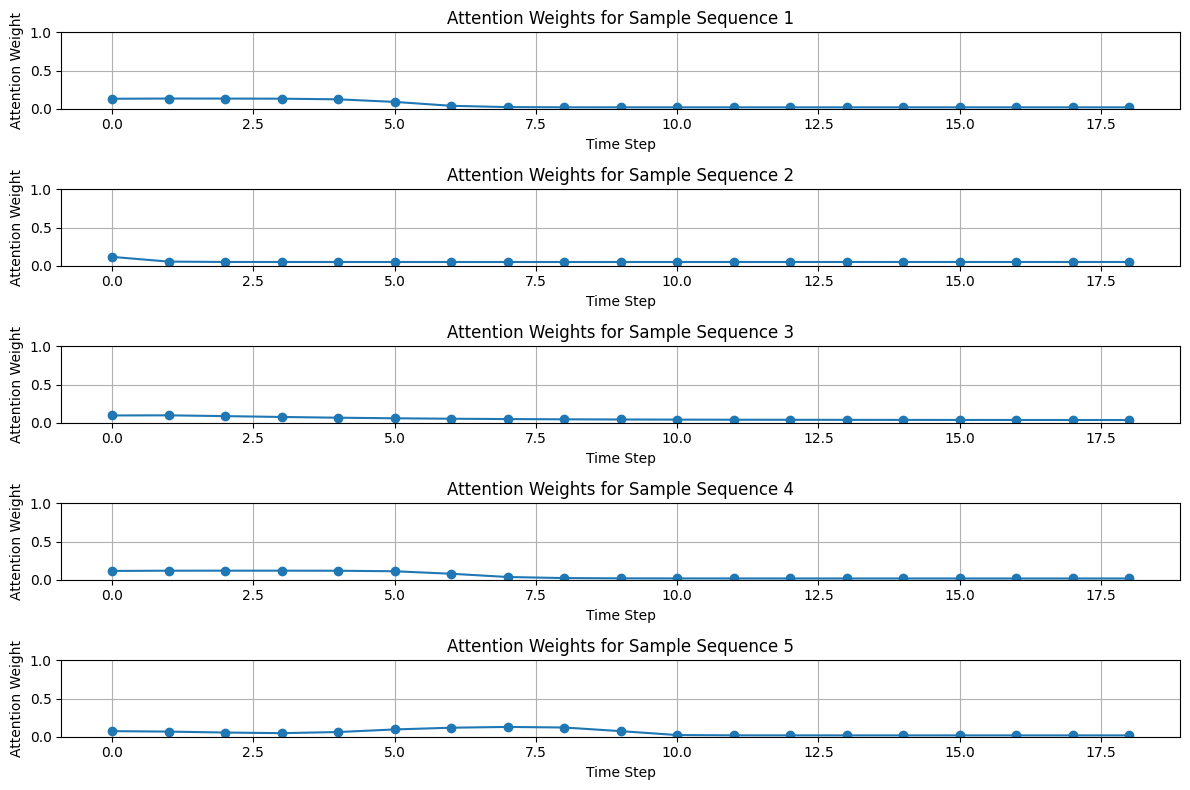

In [ ]:
import matplotlib.pyplot as plt

# Select a few sample indices to visualize
sample_indices = [0, 1, 2, 3, 4] # Visualize the first 5 collected sequences

plt.figure(figsize=(12, 8))

for i, idx in enumerate(sample_indices):
    plt.subplot(len(sample_indices), 1, i + 1)
    plt.plot(sample_attention_weights[idx].flatten(), marker='o', linestyle='-')
    plt.title(f'Attention Weights for Sample Sequence {idx+1}')
    plt.xlabel('Time Step')
    plt.ylabel('Attention Weight')
    plt.ylim(0, 1) # Attention weights are probabilities, so they are between 0 and 1
    plt.grid(True)

plt.tight_layout()
plt.show()


## Summary:

### Data Analysis Key Findings

*   Initial data inspection revealed missing values in the 'std' columns of `df_windows`, which were imputed with 0. Infinite values in `df_windows` (likely from mean calculations on empty windows) were imputed with the median.
*   After initial handling, infinite values were also found in `feature_features` and were imputed with the median.
*   Numerical features from both `df_windows` and `df_features` were successfully selected and scaled using `StandardScaler`.
*   Data was aligned based on trial start and end times from `df_features`, creating sequences of corresponding window and feature data for each trial.
*   The aligned sequences, having variable lengths, were padded to the maximum sequence length (19) to enable batch processing.
*   The preprocessed data was converted into PyTorch tensors and split into training and testing sets (80/20 split) with stratification based on the target variable ('verdict').
*   A MultiModalBiLSTM model with an attention mechanism for fusing the two modalities was successfully defined using PyTorch.
*   The model was trained for 20 epochs using the Adam optimizer and Cross-Entropy loss.
*   Training loss decreased over epochs, but test loss increased and accuracy fluctuated, suggesting potential overfitting.
*   The model achieved an overall accuracy of 0.66 on the test set.
*   Performance varied by class, with higher precision and recall for the majority 'CORRECT' class (0.76 precision, 0.80 recall) compared to minority classes like 'INCORRECT' (0.59 precision, 0.50 recall) and 'SKIP' (0.44 precision, 0.35 recall).
*   Analysis of the attention weights revealed that the model primarily focused on the initial time steps of the combined multimodal sequence, assigning higher weights to the beginning of the sequence and lower weights to later time steps.

### Insights or Next Steps

*   The model's difficulty with minority classes suggests exploring techniques like class weighting, oversampling/undersampling, or focal loss during training to improve performance on 'INCORRECT', 'SKIP', and 'Unknown' categories.
*   To gain insight into modality-specific importance (EEG vs. AU), the model architecture could be modified to include an attention mechanism that produces separate attention weights for each modality before or during fusion.
